# Math 3280 - Homework 8: SVD
(Not complete yet)

1. Explain how the Economy SVD works
    * ( )

2. Load this image into Python: SnowCollege_Winter.jpeg
<br><img src="SnowCollege_Winter.jpeg" alt="Snow College Campus after a heavy frost" width=400>
    * Convert the image to grayscale and perform an SVD to the image
    * Plot the Singular Values and the cumulative percentages of the Singular Values
    * How many ranks (columns) do I need to restore an image to 80% quality? Find an exact number, don't just estimate from the graph.
    * Restore the image to 80% quality.

Explain how the Economy SVD works?

S = svd(A) returns the singular values of matrix A in descending order.

example
[U,S,V] = svd(A) performs a singular value decomposition of matrix A, such that A = U*S*V'.

example
[ ___ ] = svd(A,"econ") produces an economy-size decomposition of A using either of the previous output argument combinations. If A is an m-by-n matrix, then:

m > n — Only the first n columns of U are computed, and S is n-by-n.

m = n — svd(A,"econ") is equivalent to svd(A).

m < n — Only the first m columns of V are computed, and S is m-by-m.

The economy-size decomposition removes extra rows or columns of zeros from the diagonal matrix of singular values, S, along with the columns in either U or V that multiply those zeros in the expression A = U*S*V'. Removing these zeros and columns can improve execution time and reduce storage requirements without compromising the accuracy of the decomposition.

##Convert the image to grayscale and perform a SVD to the image

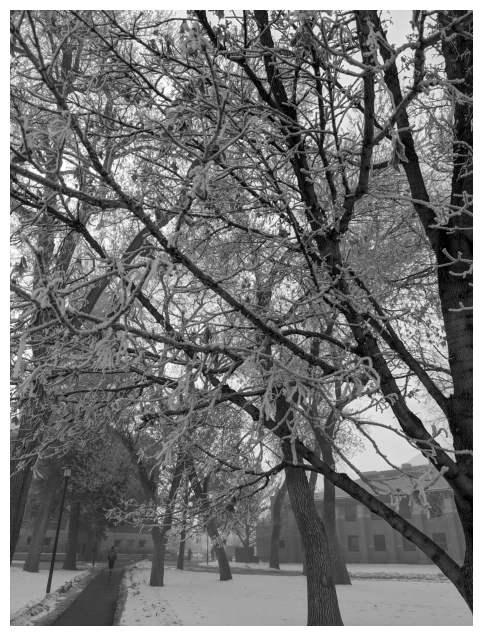

In [67]:
from matplotlib.image import imread
import matplotlib.pyplot as plt
import numpy as np
import os

plt.rcParams["figure.figsize"] = [16, 8]

A = imread("Data/SnowCollege_Winter.jpeg")
X = np.mean(A, -1)
# Convert RGB to grayscale

img = plt.imshow(X)
img.set_cmap("gray")
plt.axis("off")
plt.show()

In [68]:
np.shape(X)

(2298, 1724)

In [69]:
U, S, VT = np.linalg.svd(X, full_matrices=False)
S = np.diag(S)

In [70]:
np.shape(U[:, :r])

(2298, 1)

##Plot the Singular Values and the cumulative percentages of the Singular Values

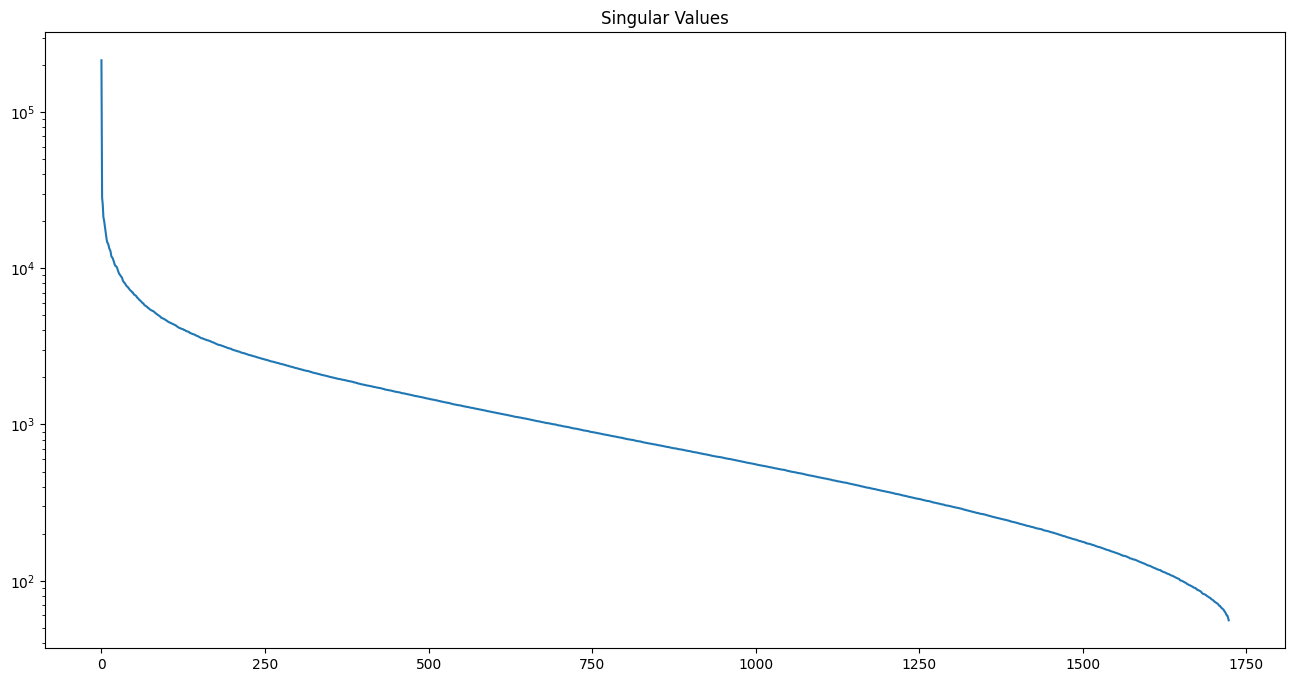

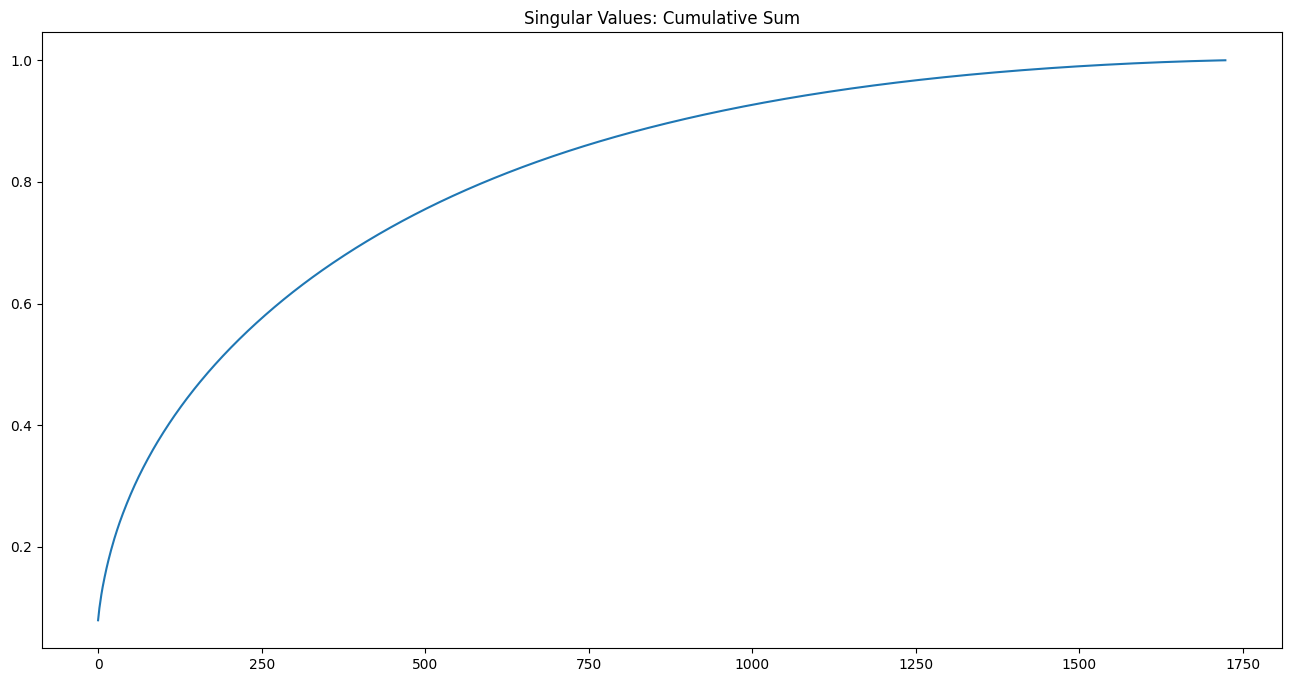

In [71]:

plt.figure(3)
plt.semilogy(np.diag(S))
plt.title("Singular Values")
plt.show()

plt.figure(2)
plt.plot(np.cumsum(np.diag(S)) / np.sum(np.diag(S)))
plt.title("Singular Values: Cumulative Sum")
plt.show()

##How many ranks (columns) do I need to restore an image to 50% quality? Find an exact number, don't just estimate from the graph.

Rank (x value) to restore 50% quality: 1


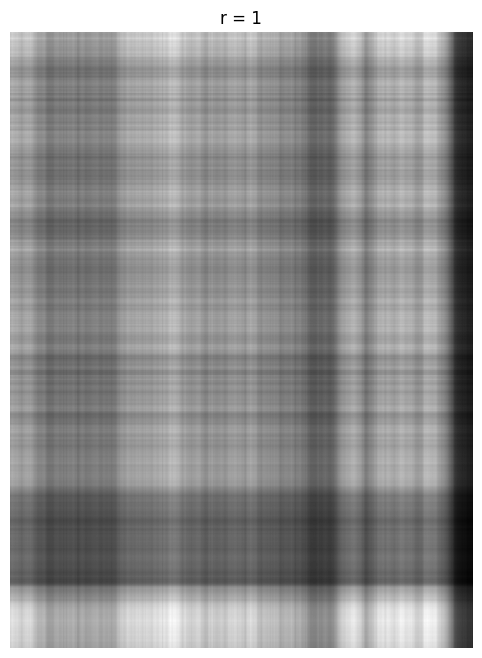

In [72]:
# Calculate the cumulative sum of the squared singular values
new_array = np.where(S >= 0.5, True, False)

singular_values_squared = np.square(S)

cumulative_sum = np.cumsum(singular_values_squared)

# Find the index where the cumulative sum reaches 50% of the total energy
threshold = cumulative_sum[-1] / 2
index = np.searchsorted(cumulative_sum, threshold)

# Determine the x value (rank)
x = index + 1

print("Rank (x value) to restore 50% quality:", x)

j = 1
r = x
    # Construct approximate image
Xapprox = U[:, :r] @ S[0:r, :r] @ VT[:r, :]
plt.figure(j)
j += 1
img = plt.imshow(Xapprox)
img.set_cmap("gray")
plt.axis("off")
plt.title("r = " + str(r))
plt.show()

##Restore the image to 50% quality.

In [49]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

# Load the iris dataset
iris = sns.load_dataset("iris")
X = iris.drop("species", axis=1)  # Exclude the 'species' column for SVD

# Apply SVD
U, S, VT = np.linalg.svd(X, full_matrices=False)

# Display the original dataset
print("Original Dataset:")
print(X.head())

# Display the shapes of U, S, and VT
print("\nShapes:")
print("U:", U.shape)
print("S:", S.shape)
print("VT:", VT.shape)

Original Dataset:
   sepal_length  sepal_width  petal_length  petal_width
0           5.1          3.5           1.4          0.2
1           4.9          3.0           1.4          0.2
2           4.7          3.2           1.3          0.2
3           4.6          3.1           1.5          0.2
4           5.0          3.6           1.4          0.2

Shapes:
U: (150, 4)
S: (4,)
VT: (4, 4)


##Import the iris dataset (as a reminder, we can load this from the Seaborn library: sns.load_dataset('iris') )
        #Apply an SVD to the dataset
        #Create graphs of the singular values and the normalized cumulative sums of the singular values

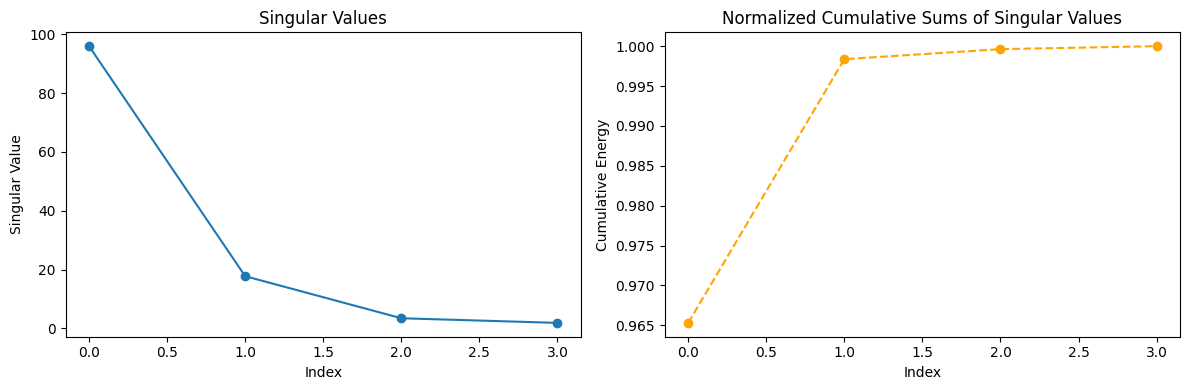

In [50]:
# Load the iris dataset
iris = sns.load_dataset("iris")
X = iris.drop("species", axis=1)  # Exclude the 'species' column for SVD

# Apply SVD
U, S, VT = np.linalg.svd(X, full_matrices=False)

# Calculate the squared singular values
singular_values_squared = np.square(S)

# Plot the singular values
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(S, marker="o")
plt.title("Singular Values")
plt.xlabel("Index")
plt.ylabel("Singular Value")

# Calculate the cumulative energy
cumulative_energy = np.cumsum(singular_values_squared) / np.sum(singular_values_squared)

# Plot the normalized cumulative sums of the singular values
plt.subplot(1, 2, 2)
plt.plot(cumulative_energy, marker="o", linestyle="--", color="orange")
plt.title("Normalized Cumulative Sums of Singular Values")
plt.xlabel("Index")
plt.ylabel("Cumulative Energy")

plt.tight_layout()
plt.show()

#How much of the variance can be restored by using just the first column?

In [51]:
# Calculate the total sum of squared singular values
total_variance = np.sum(S)

# Calculate the variance retained by the first singular value
variance_retained = (S[0]) / total_variance

print(f"Variance retained by the first column: {variance_retained * 100:.2f}%")

Variance retained by the first column: 80.59%


#Restore using a rank of r = 1, then calculate the frobenius norm of X -X hat

In [54]:
rank_r = 1
U_truncated = U[:, :rank_r]
S_truncated = np.diag(S[:rank_r])
VT_truncated = VT[:rank_r, :]
X_hat = np.dot(U_truncated, np.dot(S_truncated, VT_truncated))
frobenius_norm = np.linalg.norm(X - X_hat, "fro")
print(f"Frobenius norm of X - X_hat with rank {rank_r}: {frobenius_norm:.2f}")

Frobenius norm of X - X_hat with rank 1: 18.19


#How much of the variance can be restored by using the first 2 columns?

In [57]:
num_columns_to_retain = 2
variance_retained = np.sum(S[:num_columns_to_retain]) / np.sum(S)
print(f"Variance retained by the first {num_columns_to_retain} columns: {variance_retained * 100:.2f}%")

Variance retained by the first 2 columns: 95.51%


Restore using a rank of r = 100,000, then calculate the frobenius norm of X - X hat

In [60]:
# Set the desired rank
r = min(100000, min(X.shape))

# Truncate the singular value matrices based on the specified rank
U_truncated = U[:, :r]
S_truncated = np.diag(S[:r])
VT_truncated = VT[:r, :]

# Reconstruct the matrix using the truncated SVD
X_hat = np.dot(U_truncated, np.dot(S_truncated, VT_truncated))

# Calculate the Frobenius norm of the difference X - X_hat
frobenius_norm = np.linalg.norm(X - X_hat, "fro")

print(f"Frobenius Norm of X - X_hat (rank-{r} approximation): {frobenius_norm:.4f}")

Frobenius Norm of X - X_hat (rank-4 approximation): 0.0000
